# Exercise 5: matplotlib

## Aim: Get to grips with how to create plots and customise them with matplotlib

Find the teaching resources here: https://matplotlib.org/stable/users/explain/quick_start.html

### Issues covered:

- Creating plots
- Parts of a figure
- Styling the colours, linestyles, linewidths, markersizes etc
- Labelling plots: axis labels, titles, annotations and legends
- Axes properties: scales, ticks, plotting dates and strings
- Multiple figures, multiple axes,
- Colour-mapped data: colormaps, colorbars, normalizations

## Simple example

Q1. Let's create some sample data to plot. Create an array called `xaxis` with the value `[1,2,3,4,5]` and an array called `yaxis` with the value `[2, 16, 4, 8, 7]`. Plot this data on a single axes. Don't forget to import matplotlib!

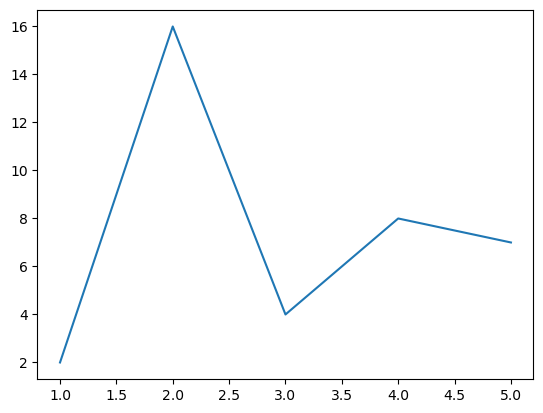

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xaxis = np.array([1, 2, 3, 4, 5])
yaxis = np.array([2, 16, 4, 8, 7])

fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot(xaxis, yaxis)  # Plot some data on the Axes.
plt.show()                           # Show the figure.

## Parts of a figure

Q2. Create 6 empty plots in a 2x3 grid.

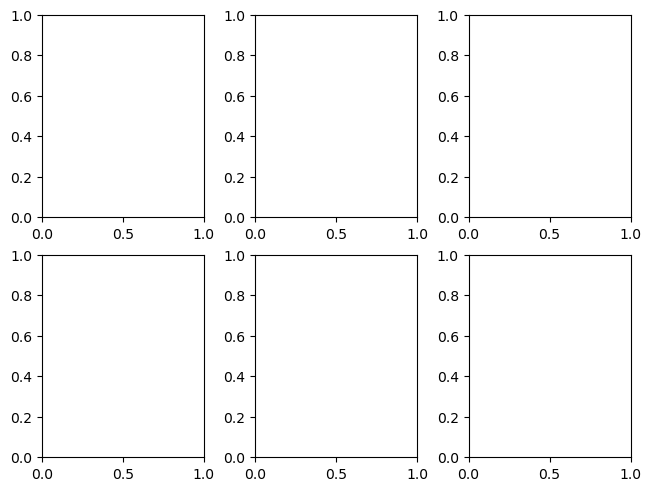

In [4]:
fig, ax = plt.subplot_mosaic([['upleft', 'upmiddle', 'upright'],
                               ['lowleft', 'lowmiddle', 'lowright']], layout='constrained')
# ax['upleft'].set_title('upleft')
# ax['upmiddle'].set_title('upmiddle')
# ax['upright'].set_title('upright')
# ax['lowleft'].set_title('lowleft')
# ax['lowmiddle'].set_title('lowmiddle')
# ax['lowright'].set_title('lowright')

## Types of inputs to plotting functions

Q3. Some inputs won't work as intended. Run the following cell to create a pandas dataframe:

In [5]:
import pandas as pd
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 5, 6, 7],
    'C': ['a', 'b', 'c', 'd']
})

Try plotting the dataframe directly. Do you know why there is an error?

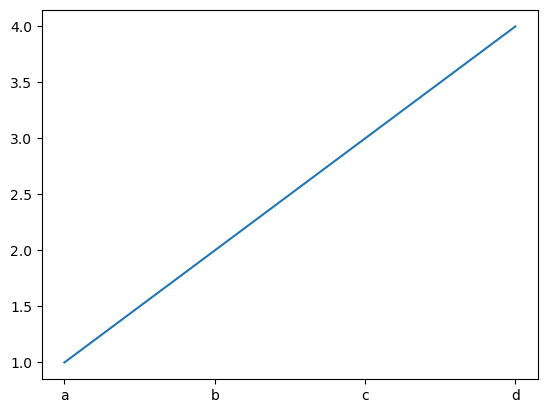

In [13]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot(df.C, df.A)  # Plot some data on the Axes.
plt.show()         

Q4. We need to extract only the numeric values to plot. Let's extract them as a numpy array and try again. Use `np.asarray(df[['A', 'B']])` to create a numpy array from the numeric data. Try plotting it now.

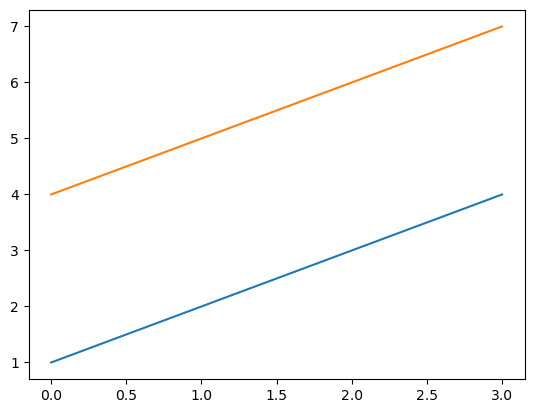

In [14]:
df_array = np.asarray(df[['A', 'B']])
plt.plot(df_array)

Q5. Let's unpack the example given in the tutorial of using matplotlib with string-indexable objects. Instead of passing numpy arrays directly, we'll pass the names of the variables as strings.


Run the following cell to create a dictionary where `a` is a numpy array of integers from 0 to 49, `c` is random integers between 0 and 50 we can use as the colour, and `d` is the absolute value of randomly generated numbers which we will use as the size of each scatter point. Then `b` is set to a noisy version of `a`. Finally, `d` is scaled to be larger.

In [41]:
# Step 1: Create the dictionary
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
# Step 2: Add b - the noisy version of a, and scale d to be bigger
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

Now we can plot the scatter plot using the syntax `ax.scatter(xvalues, yvalues, c=colours, s=scatter_point_size, data=data)`. Hint: the x and y data is 'a' and 'b' and you should know what the colour and size is.

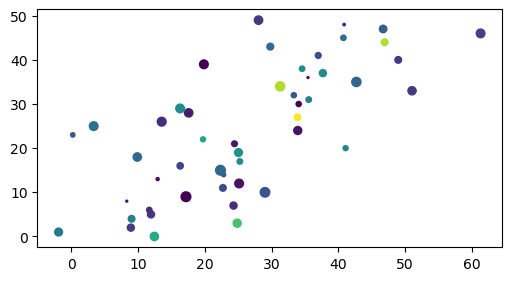

In [42]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('b', 'a', 'c','d', data=data)

## Coding styles

Q6. So far, we've been creating plots in the object oriented way: explicitly creating figures and axes. The pyplot-style is very subtly different - we just don't need to create the axis or subplots.
- Create x axis data using `np.linspace(min, max, num)`. Create 10 values between 0 and 10.
- Create y axis data using `np.linspace` to create 10 values between 0 and 100.
- Plot this data on the implicit axes using `plt.plot()` - don't worry about seeting the figsize and layout.

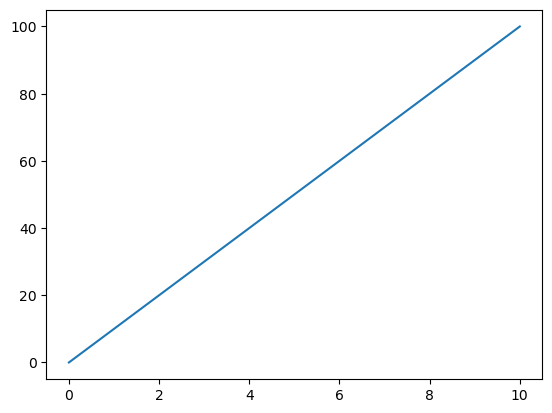

In [43]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 100, 10)
plt.plot(x, y)

## Styling

Q7. Let's use the x and y values from before and create some new y values to practice styling plots.
- Create `y2 = np.linspace(0, -100, 10)`.
- Plot both of these sets of data on the same axes using the [Styling Artists example](https://matplotlib.org/stable/users/explain/quick_start.html#styling-artists).
- Plot the original y data in purple with the `--` linestyle and the new y data in green with the `:` linestyle.
- What other values can you give for linestyle? Try editing them to be any character you want and see what happens! Can you make the lines thicker?

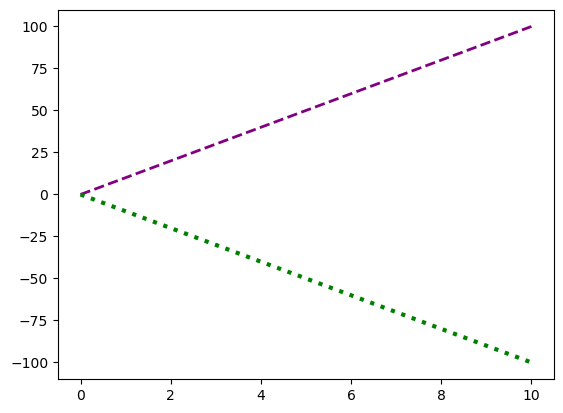

In [58]:
y2 = np.linspace(0, -100, 10)

plt.plot(x, y, linestyle='--', color = 'purple', linewidth=2)
plt.plot(x, y2, linestyle=':', color='green', linewidth = 3)

Q8. There are lots of different customisation options in matplotlib for colour! You can even have different colours for the markers and outlines in a scatter plot. Use the following to generate some data for a scatter plot:
```
data1, data2 = np.random.randn(2,100)
```
Plot this data as an `ax.scatter` plot, using a magenta outline with a green marker. Hint: you'll need to visit the [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) page to see how colours are defined.

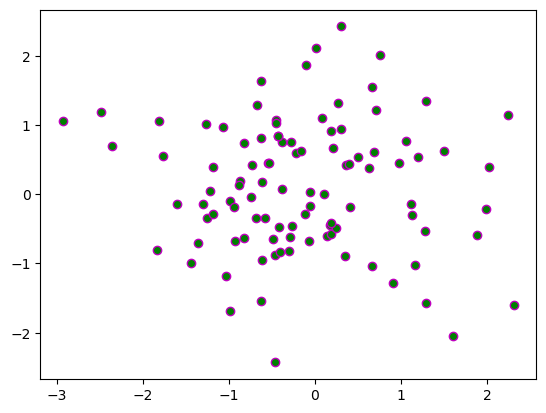

In [3]:
data1, data2 = np.random.randn(2,100)
fig,ax = plt.subplots()
ax.scatter(data1, data2, facecolor='g', edgecolor='m')

Q9. Generate two more scatter plot datasets as we did above then plot all 4 on one graph. Give each dataset a label and a different marker style - e.g. stars (`*`), plus (`P`) or diamonds (`D`). You can see more options for markers [in the documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html).

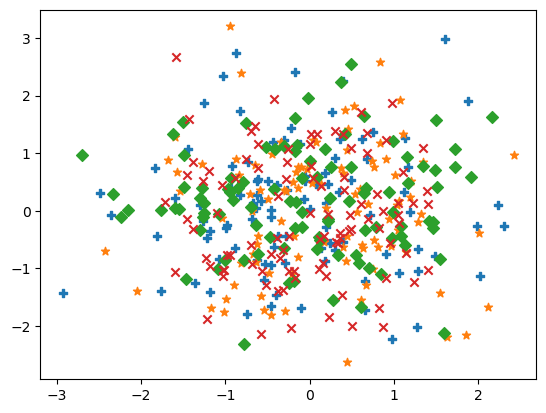

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

data3, data4 = np.random.randn (2, 100)
fig,ax = plt.subplots()
ax.scatter(data1, np.random.randn(100), marker='P')
ax.scatter(data2, np.random.randn(100), marker='*')
ax.scatter(data3, np.random.randn(100), marker='D')
ax.scatter(data4, np.random.randn(100), marker='x')


## Labelling

Q10. Take the plot we just created in the previous question and give it `xlabel`, `ylabel` and a `title` of your choice. Add some text to the plot saying `some text` at `50, 0`. Add an annotation at top saying `some annotation` with a black arrow pointing to some data using `xy=(40,2)` and `xytext=(3,1.5)`. Also add a legend identifying each data set.

## Axes

Q11. Let's practice plotting some log scale data.
- Create the xdata using `xdata = np.arange(5)`.
- Create the ydata using `ydata = np.array([0.1, 0.5, 1, 5, 10])`.
- Transform the y data by raising it to the power of 10 using `ydata = 10**ydata`.
- Plot two suplots - plot the x and y data in both plots. Set the y-axis of the second subplot to a logairthmic scale.
- Try experimenting with different datasets by changing the values in ydata. Try changing the base of the log scale - e.g. using `base=2`.

Q12. To demonstrate the difference between automatic and manual ticks, let's create two subplots. Follow the following steps:

- Create some data using `xdata = np.linspace(0, 99, 100)`, and `ydata = np.sin(xdata / 10)`
- Create a figure with 2 subplots arranged vertically.
- For the first subplot, plot the data and allow matplotlib to automatically place the ticks on the y and x axes
- For the second subplot, manually set the x-axis ticks at intervals of 30 using `np.arange(0,100,30)`, provide custom labels for these x-ticks using `('zero', '30', 'sixty', '90')` and manually set the yaxis ticks at `[-1.5, 0, 1.5]` without specifying labels so that default labels are used.
- Add titles to both subplots to distinguish between automatic and manual ticks.

Q13. Let's see how matplotlib handles plotting dates. We'll create a time series plot using an array of dates and random cumulative data:
- Run the following cell to generate a numpy array of dates starting from `2022-01-01` to `2022-01-10` at intervals of 3 hours then create a cumulative sum of random numbers for the same length of the array of dates.

In [15]:
import numpy as np

# Step 1: Generate the numpy dates
dates = np.arange(np.datetime64('2022-01-01'), np.datetime64('2022-01-10'), np.timedelta64(3, 'h'))

# Step 2: Create the cumulative sum
data = np.cumsum(np.random.randn(len(dates)))

- Plot the data with the dates on the x axis and `data` on the y axis.
- Take a look at the dates if we don't format the axis - do they look all bunched up?
- Format the x-axis with `ConciseDateFormatter` for better readability of the date ticks

Q14. Let's have a go at plotting some categorical data. We'll create a bar chart using a list of categories and random values:
- Run the following cell to define a list of four fruit names `['apple', 'banana', 'cherry', 'date']` and generate random data for these categories.

In [17]:
# Step 1: Define fruit list
categories = ['apple', 'banana', 'cherry', 'date']

# Step 2: Generate random data
values = np.random.rand(len(categories))

Create a bar plot using these categories and their corresponding random values using `ax.bar()`

Q15. Let's create a plot that demonstrates the use of both a secondary y-axis and a secondary x-axis with different scales:
- Run the following cell to generate a time series `t` ranging from 0 to 2π with 100 points and create two datasets: `s` for a sine wave and `l` for a linearly increasing dataset between 0 and the length of `t`.

In [19]:
# Step 1: Generate the time series
t = np.linspace(0, 2 * np.pi, 100)

# Step 2: Create the s and l datasets
s = np.sin(t)
l = np.arange(len(t))

- Plot both datasets on the same figure
    - On the first subplot plot the sine wave on the left y axis and the linear data on the right y axis using `twinx()`
    - On the second subplot plot the sine wave with a secondary x axis that converts radians to degrees using `secondary_xaxis()`

## Colour mapped data

Q16. Let's create a series of suplots to practice visualizing data with colormaps:
- Run the following cell to generate x, y, and z data. Then generate 2 datsets to use for our scatter plot and a third dataset to use for the colors.

In [21]:
# Step 1: Generate x and y data
x,y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))

# Step 2: Generate z data
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# Step 3: Create 3 datasets
data1 = np.random.randn(100)
data2 = np.random.randn(100)
data3 = np.random.rand(100)

- Create 4 subplots in a 2x2 grid
- First plot: use `pcolormesh()` to display z values with a colormap
- Second plot: use `contourf()` to create a filled contour plot
- Third plot: use `imshow()` with a logarithmic color scale (`LogNorm`) to represent the square of z values
- Fourth plot: create a scatter plot where the colour of each point depends on that third datset we made
- Add colorbars to each plot to indicate the mapping between data and colours

## Multiple figures/axes

Q17. Let's create a figure with multiple subplots using the `suplot_mosiac` method. Each subplot should have its own distinct data and be customized with titles, labels, and a legend. You will also need to manipulate different axes in a single figure and work with multiple figures in a single program:
- Run the following cell to create data for the plots.

In [23]:
# Step 1: Generate the data
x = np.linspace(0,2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
categories = ['A', 'B', 'C']
values = np.random.rand(len(categories))
random_x = np.random.rand(50)
random_y = np.random.rand(50)
x_exp = np.arange(0, 10, 0.1)
y_exp = np.exp(x_exp)

- Create a figure using `plt.subplot_mosaic()` with the following layout: `[['top', 'top', 'right'], ['bottom-left', 'bottom-right', 'right']]` with the layout set to `constrained` so the figure is properly spaced
- In the `top` subplot, plot `x` and `y_sin`. Label the plot and give it the color `blue`. Label the x and y axes and give a legend.
- In the `bottom-left` subplot, plot `x` and `y_cos`. Label the plot and give it the color `orange`. Label the x and y axes and give a legend.
- In the `bottom-right` subplot, plot `random_x` and `random_y`. Label the plot and give it the color `green`.Label the x and y axes.
- In the `right` subplot, plot `categories` and `values` as a bar chart and give it the colors `['purple', 'red', 'yellow']`. Label the x and y axes.
- Give appropriate titles to each subplot using `set_title()`
- Create a new figure using `plt.figure()` and plot a simple line graph of exponential growth in a single subplot using `x_exp` and `y_exp`. Give the plot x and y axis labels, a title, and a legend.
- Ensure both the mosaic figure and extra figure are displayed properly 